# Initializations

In [ ]:
data = {}

In [ ]:
import pandas as pd
import os

# Extract Email

In [ ]:
from typing_extensions import Text
import imaplib
import email
import webbrowser
import os

# account credentials
user = 'demotestemail4@gmail.com'
password = 'eecljdmtlffdjray'

# use your email provider's IMAP server
imap_server = 'imap.gmail.com'

def clean(text):
    # clean text for creating a folder
    return "".join(c if c.isalnum() else "_" for c in text)

# create an IMAP4 class with SSL 
imap = imaplib.IMAP4_SSL(imap_server)

# authenticate
imap.login(user, password)

status, messages = imap.select("INBOX")
# number of top emails to fetch
N = 10
# total number of emails
messages = int(messages[0])
text = []
attachment = []

for i in range(messages, messages-N, -1):
    # fetch the email message by ID
    res, msg = imap.fetch(str(i), "(RFC822)")
    for response in msg:
        if isinstance(response, tuple):
            # parse a bytes email into a message object
            msg = email.message_from_bytes(response[1])
            # decode the email subject
            subject, encoding = email.header.decode_header(msg["Subject"])[0]
            if isinstance(subject, bytes):
                # if it's a bytes, decode to str
                subject = subject.decode(encoding)
            # decode email sender
            From, encoding = email.header.decode_header(msg.get("From"))[0]
            if isinstance(From, bytes):
                From = From.decode(encoding)
            print("Subject:", subject)
            print("From:", From)
            # if the email message is multipart
            if msg.is_multipart():
                # iterate over email parts
                for part in msg.walk():
                    # extract content type of email
                    content_type = part.get_content_type()
                    content_disposition = str(part.get("Content-Disposition"))
                    try:
                        # get the email body
                        body = part.get_payload(decode=True).decode()
                    except:
                        pass
                    if content_type == "text/plain" and "attachment" not in content_disposition:
                        # print text/plain emails and skip attachments
                        print(body)
                        text.append(body)
                    elif "attachment" in content_disposition:
                        # get file attachment
                        filename = part.get_filename()
                        print(filename)
                        attachment.append(filename)
                        if filename:
                            folder_name = clean(subject)
                            if not os.path.isdir(folder_name):
                                # make a folder for this email (named after the subject)
                                os.mkdir(folder_name)
                            filepath = os.path.join(folder_name, filename)
                            # download attachment and save it
                            open(filepath, "wb").write(part.get_payload(decode=True))
            else:
                # extract content type of email
                content_type = msg.get_content_type()
                # get the email body
                body = msg.get_payload(decode=True).decode()
                if content_type == "text/plain":
                    # print only text email parts
                    print(body)
                    text.append(body)
            if content_type == "text/html":
                # if it's HTML, create a new HTML file and open it in browser
                folder_name = clean(subject)
                if not os.path.isdir(folder_name):
                    # make a folder for this email (named after the subject)
                    os.mkdir(folder_name)
                filename = "index.html"
                filepath = os.path.join(folder_name, filename)
                # write the file
                open(filepath, "w").write(body)
                # open in the default browser
                webbrowser.open(filepath)
            print("="*100)
# close the connection and logout
imap.close()
imap.logout()

Subject: Your trial has expired
From: Mailosaur <hello@mailosaur.com>
If you would still like to upgrade click through to choose the right plan for you.

Your trial has expired

Hi there,

Your Mailosaur trial has come to an end, which means that you'll no longer have access to email and SMS testing features.

If you would still like to upgrade click below to choose the right plan for you. Alternatively, if you have any questions get in touch (https://d2mwGW04.na1.hubspotlinks.com/Ctc/LZ+113/d2mwGW04/VWmzK75btGkTW4_PK-74jVvgJW7HlLKX4WQsNZN1xVmZL3pl37V1-WJV7CgRc6W1ZQQXl1HF0FhW2Tj3KK8nKCxLW5M76lM65CsGkN2_ZkC6Zn5sVW6T8Vd93BNbbhW6qxF8k7QJ5QqW6LlFRs4T0zY-W2W81D55rPQ28W8ZTqmy4fdx0ZW1nx48C1d-4G0W2WdcnZ6KBbFqN982C9jH8VnkW276_d92lmqSKW6XrDB07mcNthW91-Zl29f16vvW9dt-_H2_wK9FW5qfRM-7t4szlW17FyTF86_lD0W8gZBxS3gMl38W67LPHc6ck5XYW1B0Flv6ZM5d5W2pBcqK76Xc1vVwbwRG3RpDnrW8bKRRb8QfdTDN8N5C9Mv1PvzW5XPZXK7n__2331yM1 ) and let us know how we can help.

Upgrade your plan
(https://d2mwGW04.na1.hubspotlinks.com

('BYE', [b'LOGOUT Requested'])

In [ ]:
print(len(attachment))

1


In [ ]:
len(text)

10

# Neural networks

In [ ]:
# import necessary libraries

import tensorflow
import keras
import nltk
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# to upload the dataset

from google.colab import files
uploaded = files.upload()

Saving phishing_email_dataset.csv to phishing_email_dataset.csv


In [ ]:
# to load dataset 

import pandas as pd
 
df = pd.read_csv('phishing_email_dataset.csv')

In [ ]:
# display first 5 rows of the dataset

df.head()

,Unnamed: 0,text,source,is_phishing
0,0,Subject: ena offsite my suggestions : 1 ) moun...,ENRON,0
1,1,Subject: allegheny energy s - 3 i received wor...,ENRON,0
2,2,The University of Washington System is sharing...,https://ciso.uw.edu/education/more-phishing-ex...,1
3,3,"Dear user@stanford.edu, A private document has...",https://uit.stanford.edu/phishing,1
4,4,Subject: james valverde - interview schedule a...,ENRON,0


In [ ]:
# to remove stop words from the email text

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stop_words(text):
  text.lower()
  text = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  text = [word for word in text if word.isalpha() and not word in stop_words]
  return ' '.join(text)

x = df.apply(lambda row: remove_stop_words(row['text']), axis=1)
y = df['is_phishing']

print(x)

0      Subject ena offsite suggestions mountains jack...
1      Subject allegheny energy received word mike mo...
2      The University Washington System sharing funds...
3      Dear user A private document sent Human Resour...
4      Subject james valverde interview schedule atta...
                             ...                        
321    Subject oto office thru vacation questions mik...
322    Subject calpine daily gas nomiantion per phone...
323    Dear Colleague Lehigh University upgraded Univ...
324    Linkedin Important Profile Changes Just click ...
325    Name Are desk I need send email attachment ind...
Length: 326, dtype: object


In [ ]:
# convert the words in email text to tokens

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
 
max_words = 20000
max_length = 500
 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
x = pad_sequences(sequences, maxlen=max_length)
print(x)

[[   0    0    0 ...  234   46  145]
 [   0    0    0 ...  628   83   17]
 [   0    0    0 ...  487   13  357]
 ...
 [   0    0    0 ...  178  239  216]
 [   0    0    0 ...  132  669  541]
 [   0    0    0 ...   32   22 1026]]


In [ ]:
# build a neural network (sequential network) for binary classification

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Embedding
 
model = Sequential() 
model.add(Embedding(max_words, 32, input_length=max_length)) 
model.add(Flatten())
keras.layers.Dropout(rate=0.7)
model.add(Dense(60, activation='relu'))
keras.layers.Dropout(rate=0.65)
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           640000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 60)                960060    
                                                                 
 dense_1 (Dense)             (None, 40)                2440      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,602,541
Trainable params: 1,602,541
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# spliting dataset for training and testing purposes

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.1, random_state=7)

In [ ]:
# training the model with training set

hist = model.fit(x_train, y_train, validation_split=0.1, epochs=5, batch_size=18)

Epoch 1/5
15/15 [==============================] - 2s 60ms/step - loss: 0.6614 - accuracy: 0.6388 - val_loss: 0.6901 - val_accuracy: 0.5667
Epoch 2/5
15/15 [==============================] - 0s 29ms/step - loss: 0.5841 - accuracy: 0.6540 - val_loss: 0.5157 - val_accuracy: 0.7333
Epoch 3/5
15/15 [==============================] - 0s 31ms/step - loss: 0.4519 - accuracy: 0.8023 - val_loss: 0.4828 - val_accuracy: 0.7333
Epoch 4/5
15/15 [==============================] - 0s 28ms/step - loss: 0.2483 - accuracy: 0.9430 - val_loss: 0.2996 - val_accuracy: 0.9000
Epoch 5/5
15/15 [==============================] - 0s 31ms/step - loss: 0.0916 - accuracy: 0.9962 - val_loss: 0.1702 - val_accuracy: 0.9667


[]

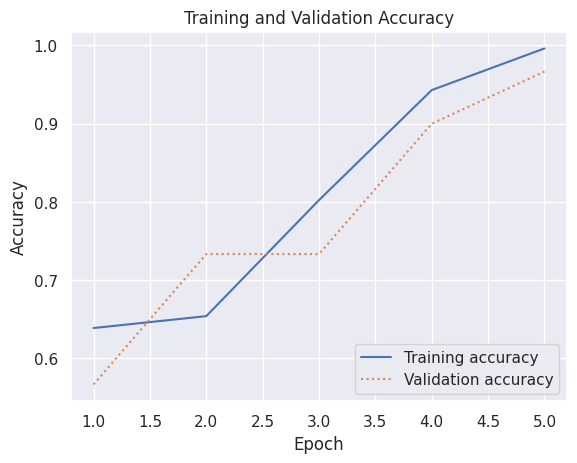

In [ ]:
# graph of training and validation accuracy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
# we can give test set to the model
# and let it make predictions whether a given email from test set is phishing or not

from sklearn.metrics import accuracy_score, confusion_matrix

y_pred=model.predict(x_test)

2/2 [==============================] - 0s 15ms/step


Text(0, 0.5, 'Probability whether an email is phishing or not')

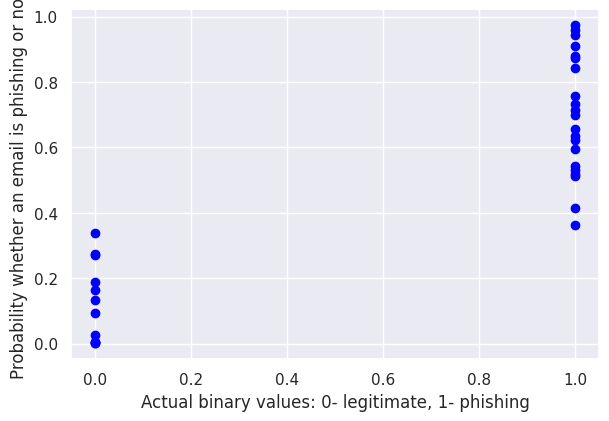

In [ ]:
# Scatterplot of true values and predicted values

import matplotlib.pyplot as plt # Visual Plots

fig = plt.figure(figsize=(15,10))
ax = plt.subplot2grid((2,2),(0,0))
plt.scatter(x= y_test, y=y_pred, color=('blue'))
ax.set_xlabel("Actual binary values: 0- legitimate, 1- phishing")
ax.set_ylabel("Probability whether an email is phishing or not")

In [ ]:
# since the predicted values are in probablities (0.0 to 1.0)
# we can assign 0 value for the predicted values less than 0.5
# and 1 value for predicted values having more tha 0.5 value

y_bin = [int(p>=0.5) for p in y_pred]

In [ ]:
# confusion matrix to find false positives and false negatives

A = confusion_matrix(y_test, y_bin, labels=[1,0])
print(A)

[[19  2]
 [ 0 12]]


In [ ]:
print("Number of phishing emails correctly identified: ", A[0][0])
print("Number of legitimate emails correctly identified: ", A[1][1])
print("Number of legitimate emails wrongly identified as phishing mails: ", A[0][1])
print("Number of phishing emails wrongly identified as legitimate mails: ", A[1][0])

Number of phishing emails correctly identified:  19
Number of legitimate emails correctly identified:  12
Number of legitimate emails wrongly identified as phishing mails:  2
Number of phishing emails wrongly identified as legitimate mails:  0


In [ ]:
# calculating accuracy score for the model

score= accuracy_score(y_test, y_bin)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.94%


In [ ]:
text1 = text[0:1]

Applying model on email text extracted from Gmail

In [ ]:
M = []
for r in text1:
  remove_stop_words(r)
  max_words = 20000
  max_length = 500
 
  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(r)
  sequences = tokenizer.texts_to_sequences(r)
  m =pad_sequences(sequences, maxlen=max_length)
  M.append(m)

In [ ]:
for i in M:
  print(i)

[[ 0  0  0 ...  0  0 34]
 [ 0  0  0 ...  0  0 16]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0 10]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [ ]:
def Email_body_check(M):
  for i in M:
    pred = []
    r = model.predict(i)
    pred.append(r)
    bin = [int(p>=0.5) for p in y_pred]
    s = sum(bin)/len(bin)
    return s

In [ ]:
email_result = Email_body_check(M)

166/166 [==============================] - 2s 9ms/step


In [ ]:
print(email_result)

0.5757575757575758


# URL extracting and checking for phishing features

In [ ]:
! pip install python-whois
! pip install mechanicalsoup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103262 sha256=2a702a657844446bf8608a0fd3789d39384f323c4a1aba7f35862af7b6232652
  Stored in directory: /root/.cache/pip/wheels/e6/e9/d3/1e41a6c95b398de12c5a332ff28805aa44e68aa317ea60266d
Successfully built python-whois
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
from whois import whois
import datetime
from datetime import date
import mechanicalsoup

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving phishing_site_urls_random sample.csv to phishing_site_urls_random sample.csv


In [ ]:
# Read the data
import io
tdf = pd.read_csv(io.BytesIO(uploaded['phishing_site_urls_random sample.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df2 = tdf.loc[0:]

In [ ]:
df2.head(10)

,URL,Label
0,outaplaceshave.cn/krp3cmg/images/,bad
1,ebayisapidlld.altervista.org/,bad
2,javaupdatecache.com/,bad
3,lopertopgo.su/krp3cmg/images/,bad
4,promusic.co/components/interbank.com/,bad
5,wreathsacrossamerica.org/locations/,good
6,goyanok.at/krp3cmg/images/,bad
7,worldswithoutend.com/books_Locus-F_index.asp,good
8,worldswithoutend.com/books_Locus-SF_index.asp,good
9,therepalon.su/krp3cmg/images/,bad


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df2[['Label']]).toarray())

#merge one-hot encoded columns back with original DataFrame
df3 = df2.join(encoder_df)

In [ ]:
df3 = df3.drop(['Label'], axis=1)

In [ ]:
df3.columns = ['URL', 'Label_bad', 'Label_good']

In [ ]:
df3.head(15)

,URL,Label_bad,Label_good
0,outaplaceshave.cn/krp3cmg/images/,1.0,0.0
1,ebayisapidlld.altervista.org/,1.0,0.0
2,javaupdatecache.com/,1.0,0.0
3,lopertopgo.su/krp3cmg/images/,1.0,0.0
4,promusic.co/components/interbank.com/,1.0,0.0
5,wreathsacrossamerica.org/locations/,0.0,1.0
6,goyanok.at/krp3cmg/images/,1.0,0.0
7,worldswithoutend.com/books_Locus-F_index.asp,0.0,1.0
8,worldswithoutend.com/books_Locus-SF_index.asp,0.0,1.0
9,therepalon.su/krp3cmg/images/,1.0,0.0


In [ ]:
df3 = df3.drop(['Label_good'], axis=1)

In [ ]:
# function for extracting urls from email body 

def Find(content):
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex, content)
    return [x[0] for x in url]

# defining functions for each of the phishing features
  
def phishtank_check(i):
  browser = mechanicalsoup.StatefulBrowser()
  browser.open("https://www.phishtank.com/")
  try:
    form = browser.select_form(selector='form', nr=1)
    browser["isaphishurl"] = i
    my_button = browser.get_current_page().find('input', value='Is it a phish?')
    response = browser.submit_selected(btnName = my_button)
    s1 = 'This site is not a phishing site.'
    s2 = 'Is a phish'
    if s1 in response.text:
      return 0
    elif s2 in response.text:
      return 1
    else:
      return 0.5
  except:
    return 0.7

def numOfDays(date1, date2):
    return (date2-date1).days

def domain_check(i):
    try: 
      W = whois(i)
      if type(W["creation_date"]) == list:
        S = str(W["creation_date"][0])
        s = S[0:10]
      else:
        s = str(W["creation_date"])
      year, month, day = int(s[0:10][0:4]), int(s[0:10][5:7]), int(s[0:10][8:10])
      date1 = date(year, month, day)
      date2 = date(2023, 2, 6)
      n = numOfDays(date1, date2)
      if n <= 150:
        return 1
      else:
        return 0
    except:
      return 1

def url_character_check(i):
  if '@' in i:
    return 1
  else:
    return 0

def ip_check(i):
  if 'www.' in i:
    p = i.index('www.')
    if type(i[p+4]) == int:
      return 1
    else:
      return 0
  else:
    return 0

def url_length(i):
  if len(i) > 100:   
    return 1
  else:
    return 0

def form_tag_check(i):
  browser = mechanicalsoup.StatefulBrowser()
  try:
    browser.open(i)
    form = browser.select_form()
    return 0
  except:
    return 1

def count(l):
  c = 0
  for x in l:
    c += 1
  if c > 0:
      return 1
  else:
    return 0  

In [ ]:
df3['link'] = df3.apply(lambda row: count(row['URL']), axis=1)
df3['length'] = df3.apply(lambda row: url_length(row['URL']), axis=1)
df3['phishtank'] = df3.apply(lambda row: phishtank_check(row['URL']), axis=1)
df3['domain'] = df3.apply(lambda row: domain_check(row['URL']), axis=1)
df3['ip_address'] = df3.apply(lambda row: ip_check(row['URL']), axis=1)
df3['attherate'] = df3.apply(lambda row: url_character_check(row['URL']), axis=1)
df3['form_tag'] = df3.apply(lambda row: form_tag_check(row['URL']), axis=1)

Error trying to connect to socket: closing socket - timed out


In [ ]:
df3.head(10)

,URL,Label_bad,link,length,phishtank,domain,ip_address,attherate,form_tag
0,outaplaceshave.cn/krp3cmg/images/,1.0,1,0,0.5,1,0,0,1
1,ebayisapidlld.altervista.org/,1.0,1,0,0.5,1,0,0,1
2,javaupdatecache.com/,1.0,1,0,0.5,1,0,0,1
3,lopertopgo.su/krp3cmg/images/,1.0,1,0,0.5,1,0,0,1
4,promusic.co/components/interbank.com/,1.0,1,0,0.5,1,0,0,1
5,wreathsacrossamerica.org/locations/,0.0,1,0,0.5,0,0,0,1
6,goyanok.at/krp3cmg/images/,1.0,1,0,0.5,1,0,0,1
7,worldswithoutend.com/books_Locus-F_index.asp,0.0,1,0,0.5,0,0,0,1
8,worldswithoutend.com/books_Locus-SF_index.asp,0.0,1,0,0.5,0,0,0,1
9,therepalon.su/krp3cmg/images/,1.0,1,0,0.5,1,0,0,1


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 42)

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df3['Label_bad'])
# axis 1 refers to the columns
df4 = df3.drop(['URL'], axis = 1)
features= df4.drop(['Label_bad'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
predictions = rf.predict(test_features)

In [ ]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
mae = round(np.mean(errors),2)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.34


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = (mae / len(test_labels))*100
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.64 %.


Actual Check

In [ ]:
url = []
for msg in text1:
  link = re.findall('https?://.*', msg)
  for i in link:
    m = ''
    for j in i:
      if j != ' ':
        m += j
      else:
        break
    print(m)
    url.append(m)
url = [*set(url)]  

https://d2mwGW04.na1.hubspotlinks.com/Ctc/LZ+113/d2mwGW04/VWmzK75btGkTW4_PK-74jVvgJW7HlLKX4WQsNZN1xVmZL3pl37V1-WJV7CgRc6W1ZQQXl1HF0FhW2Tj3KK8nKCxLW5M76lM65CsGkN2_ZkC6Zn5sVW6T8Vd93BNbbhW6qxF8k7QJ5QqW6LlFRs4T0zY-W2W81D55rPQ28W8ZTqmy4fdx0ZW1nx48C1d-4G0W2WdcnZ6KBbFqN982C9jH8VnkW276_d92lmqSKW6XrDB07mcNthW91-Zl29f16vvW9dt-_H2_wK9FW5qfRM-7t4szlW17FyTF86_lD0W8gZBxS3gMl38W67LPHc6ck5XYW1B0Flv6ZM5d5W2pBcqK76Xc1vVwbwRG3RpDnrW8bKRRb8QfdTDN8N5C9Mv1PvzW5XPZXK7n__2331yM1
https://d2mwGW04.na1.hubspotlinks.com/Ctc/LZ+113/d2mwGW04/VWmzK75btGkTW4_PK-74jVvgJW7HlLKX4WQsNZN1xVmZL3pl37V1-WJV7CgHldV6z2zJ6gcfFfVRjD6P1ZfFRvW4mVNkY8ZglQ-W1D9XDP5tSBvWW8vT-tt3LkffQW6ymwSj7YhTJSW8CF_CC9k1M0xW4N1Xw35jNXNfW5t93pg4MW5bGW35lhRr6pPNyVW7YvqjQ4dCkHJVyCb9b7rh95dW4HrGMd1Rcz5PW60VC4P97G_jcW2MYrvs4y5yHqVyR3l76zTF3FW1fFfkt2V6Y3SVnnsxh21j6ycW6gwzjf17WsHpW5WX-_j5-xr1DW8t2-TN8ZVv1nN5mKSqPbdvwVW2b5VYQ7zkckFW30C5c335SXZyW1Jx_FQ72g8nvW9hgHPd41lWtg360z1
https://d2mwGW04.na1.hubspotlinks.com/Ctc/LZ+113/d2mwGW04/VWmzK75btGkTW4_PK-74jVvg

In [ ]:
data = {'url': url}

In [ ]:
udf = pd.DataFrame(data)

In [ ]:
udf['link'] = udf.apply(lambda row: count(row['url']), axis=1)
udf['length'] = udf.apply(lambda row: url_length(row['url']), axis=1)
udf['phishtank'] = udf.apply(lambda row: phishtank_check(row['url']), axis=1)
udf['domain'] = udf.apply(lambda row: domain_check(row['url']), axis=1)
udf['ip_address'] = udf.apply(lambda row: ip_check(row['url']), axis=1)
udf['attherate'] = udf.apply(lambda row: url_character_check(row['url']), axis=1)
udf['form_tag'] = udf.apply(lambda row: form_tag_check(row['url']), axis=1)

In [ ]:
udf.head(10)

,url,link,length,phishtank,domain,ip_address,attherate,form_tag
0,https://d2mwGW04.na1.hubspotlinks.com/Ctc/LZ+1...,1,1,0.7,0,0,0,1
1,https://hs-20078598.s.hubspotemail.net/hs/mana...,1,1,0.7,0,0,0,0
2,https://d2mwGW04.na1.hubspotlinks.com/Ctc/LZ+1...,1,1,0.7,0,0,0,1
3,https://d2mwGW04.na1.hubspotlinks.com/Ctc/LZ+1...,1,1,0.7,0,0,0,1
4,https://d2mwGW04.na1.hubspotlinks.com/Ctc/LZ+1...,1,1,0.7,0,0,0,1
5,https://d2mwGW04.na1.hubspotlinks.com/Ctc/LZ+1...,1,1,0.7,0,0,0,1
6,https://d2mwGW04.na1.hubspotlinks.com/Ctc/LZ+1...,1,1,0.7,0,0,0,1
7,https://hs-20078598.s.hubspotemail.net/hs/mana...,1,1,0.7,0,0,0,0
8,https://d2mwGW04.na1.hubspotlinks.com/Ctc/LZ+1...,1,1,0.7,0,0,0,1


In [ ]:
features= udf.drop(['url'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
predictions = rf.predict(features)

In [ ]:
print(predictions)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
url_check_result = np.sum(predictions)/len(predictions)

In [ ]:
url_check_result

1.0

# File Attachment check

In [ ]:
print(attachment)

['9b7546a541ab380cac91f2ae09cde6fd.png']


In [ ]:
phishing = ['.7z', '.application', '.appref-ms', '.appxbundle', '.arj', '.asd', '.bgi', '.bz2', '.cab', '.daa', '.desktopthemepackfile', '.doc', '.docm', '.dot', '.dotm', '.eml', '.gadget', '.gz', '.htm', '.html', '.hwpx', '.ics', '.img', '.iqy', '.jnlp', '.library-ms', '.lnk', '.mam', '.mht', '.html', '.msrcincident', '.odt', '.oxps', '.pdf', '.pot', '.potm', '.ppa', '.ppam', '.pps', '.ppsm', '.ppt', '.pub', '.rar', '.rtf', '.scf', '.searchConnector-ms', '.settingcontents-ms', '.sldm', '.slk', '.svg', '.tar', '.theme', '.themepack', '.url', '.uue', '.wbk', '.website', '.wim', '.wiz', '.xlam', '.xll', '.xlm', '.xls', '.xlsb', '.xlsm', '.xlt', '.xltm', '.xps', '.xz', '.z', '.zip']

In [ ]:
executable = ['.a3x', '.appinstaller', '.applescript', '.application', '.appref-ms', '.appx', '.appxbundle', '.bat', '.chm', '.cmd', '.com', '.cpl', '.cs', '.daa', '.diagcab', '.dll', '.dmg', '.exe', '.gadget', '.hta', '.img', '.iso', '.jar', '.jnlp', '.js', '.jse', '.lnk', '.mam', '.msi', '.ocx', '.pif', '.ppa', '.ppam', '.ppkg', '.ps1', '.py', '.pyc', '.pyo', '.pyw', '.pyz', '.pyzw', '.scpt', '.scr', '.service', '.settingcontent-ms', '.sh', '.so', '.timer', '.vb', '.vbe', '.vbs', '.wim', '.ws', '.wsf', '.wsh', '.xlam', '.xll']

In [ ]:
file_archiver = ['.7z', '.arj', '.bz2', '.cab', '.daa', '.gadget', '.gz', '.rar', '.tar', '.uue', '.vhd', '.vhdx', '.wim', '.xz', '.z', '.zip']

In [ ]:
script = ['.a3x', '.bat', '.bgi', '.cmd', '.hta', '.htm', ',html', '.js', '.jse', '.mht', '.mhtml', '.mof', '.pdf', '.ps1', '.py', '.pyc', '.pyo', '.pyw', '.pyz', '.pyzx', '.scpt', '.sct', '.service', '.sh', '.svg', '.vb', '.vbs', '.vbe', '.ws', '.wsf', '.wsh', '.xsl']

In [ ]:
double_click = ['.appinstaller', '.application', '.appref-ms', '.appx', '.appxbundle', '.asd', '.bat', '.bz2', '.chm', '.cmd', '.com', '.cpl', '.desktopthemepackfile', '.diagcab', '.dmg', '.doc', '.docm', '.dot', '.dotm', '.exe', '.gadget', '.gz', '.hta', '.htm', '.html', '.ics', '.img', '.iqy', '.iso' '.jnlp', '.js', '.jse', '.lnk', '.mam', '.mht', '.mhtml', '.msc', '.msi', '.odt', '.oxps', '.pdf', '.pot', '.potm', '.pps', '.ppsm', '.ppt', '.pptm', '.pub', '.reg', '.rtf', '.scr', '.settingcontent-ms', '.sh', '.sldm', '.slk', '.svg', '.tar', '.theme', '.themepark', '.url', '.uue', '.vbe', '.vbs', '.wbk', '.website', '.wsf', '.wsh', '.xll', '.xlm', '.xls', '.xlsb', '.xlsm', '.xls', '.xlt', '.xltm', '.xps', '.xps', '.zip']

In [ ]:
macros = ['.asd', '.doc', '.docm', '.docm', '.dot', '.pot', '.potm', '.pps', '.ppsm', '.ppt', '.pub', '.sldm', '.slk', '.wbk', '.xlam', '.xlm', '.xlsm', '.xlsb', '.xlt', '.xltm', '.xls']

In [ ]:
def executable_check(p):
  if p in executable:
    return 1
  else:
    return 0

In [ ]:
def phishing_check(p):
  if p in phishing:
    return 1
  else:
    return 0

In [ ]:
def macros_check(p):
  if p in macros:
    return 1
  else:
    return 0

In [ ]:
def double_click_check(p):
  if p in double_click:
    return 1
  else: 
    return 0

In [ ]:
def file_archiver_check(p):
  if p in file_archiver:
    return 1
  else:
    return 0

In [ ]:
def script_check(p):
  if p in script:
    return 1
  else:
    return 0

In [ ]:
def extension_check(p):
  executable_check(p)
  phishing_check(p)
  macros_check(p)
  double_click_check(p)
  file_archiver_check(p)
  script_check(p)  

In [ ]:
def split(i):
  p = os.path.splitext(i)
  return p[-1]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Filenames.csv to Filenames.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Filenames.csv']))

In [ ]:
df['Extension'] = df.apply(lambda row: split(row['Filename']), axis=1)

In [ ]:
df['phishing'] = df.apply(lambda row: phishing_check(row['Extension']), axis=1)

In [ ]:
df['executable'] = df.apply(lambda row: executable_check(row['Extension']), axis=1)

In [ ]:
df['macros'] = df.apply(lambda row: macros_check(row['Extension']), axis=1)

In [ ]:
df['double_click'] = df.apply(lambda row: double_click_check(row['Extension']), axis=1)

In [ ]:
df['file_archiver'] = df.apply(lambda row: file_archiver_check(row['Extension']), axis=1)

In [ ]:
df['script'] = df.apply(lambda row: file_archiver_check(row['Extension']), axis=1)

In [ ]:
df.head()

,Filename,Label,Extension,phishing,executable,macros,double_click,file_archiver,script
0,AskToolbarInstaller-ATU3_TMP[4].7z,1,.7z,1,0,0,0,1,1
1,Mathron.tst,1,.tst,0,0,0,0,0,0
2,Contest_guidelines.pdf,0,.pdf,1,0,0,1,0,0
3,mbtCCDF.scr,1,.scr,0,1,0,1,0,0
4,iThemes.dll,1,.dll,0,1,0,0,0,0


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators = 20, random_state = 42)

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['Label'])
# axis 1 refers to the columns
df2= df.drop(['Label'], axis = 1)
features= df2.drop(['Filename', 'Extension'], axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
# Train the model on training data
rf2.fit(train_features, train_labels);

In [ ]:
predictions = rf2.predict(test_features)

In [ ]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
mae = round(np.mean(errors),2)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.58


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = (mae / len(test_labels))*100
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.4 %.


Applying this random forest on the extracted filenames

In [ ]:
fdf = pd.DataFrame(attachment)

In [ ]:
fdf.columns = ['Attachment']

In [ ]:
fdf['Extension'] = fdf.apply(lambda row: split(row['Attachment']), axis=1)
fdf['phishing'] = fdf.apply(lambda row: phishing_check(row['Attachment']), axis=1)
fdf['executable'] = fdf.apply(lambda row: executable_check(row['Attachment']), axis=1)
fdf['script'] = fdf.apply(lambda row: script_check(row['Attachment']), axis=1)
fdf['macros'] = fdf.apply(lambda row: macros_check(row['Attachment']), axis=1)
fdf['double-click'] = fdf.apply(lambda row: double_click_check(row['Attachment']), axis=1)
fdf['file_archiver'] = fdf.apply(lambda row: file_archiver_check(row['Attachment']), axis=1)              

In [ ]:
fdf.head()

,Attachment,Extension,phishing,executable,script,macros,double-click,file_archiver
0,9b7546a541ab380cac91f2ae09cde6fd.png,.png,0,0,0,0,0,0


In [ ]:
# Use numpy to convert to arrays
import numpy as np
# axis 1 refers to the columns
f= fdf.drop(['Attachment'], axis = 1)
feature = f.drop(['Extension'], axis = 1)
# Saving feature names for later use
feature_list = list(feature.columns)
# Convert to numpy array
feature = np.array(feature)

In [ ]:
pred1 = rf2.predict(feature)

In [ ]:
print(pred1)

[0.05]


# Predictor

In [ ]:
file_attachment_check = pred1
url_check = url_check_result
email_text_check = email_result

In [ ]:
final_result = (file_attachment_check+url_check+email_text_check)/3
print(final_result)

[0.54191919]


In [ ]:
if final_result >= 0.8:
  print("Very likely that your email is phishing- ignore this email, or report it")
elif final_result >=0.5 and final_result < 0.8:
  print("Some possiblity that you email is phishing- be careful if the sender is someone you know")
elif final_result >= 0.3 and final_result < 0.5:
  print("Some possibility that your email is not phishing- but please exercise caution while opening them")
elif final_result < 0.3:
  print("Low possibility that your email is not phishing")

Some possiblity that you email is phishing- be careful if the sender is someone you know
